# Project: Wrangling and Analyze Data

Importing the necessary libraries that would be needed to carry out the project

In [95]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import requests
import tweepy 
import json
import re
import urllib.request
from datetime import datetime
from functools import reduce
from IPython.display import Image
plt.style.use('seaborn')

%matplotlib inline
import warnings; warnings.simplefilter('ignore')

### Data Gathering

Getting data that was manually saved in my local machine

In [96]:
# read twitter-archive-enhanced.csv from directory to DataFrame
data_1 = pd.read_csv('twitter-archive-enhanced.csv')

I Dowloaded the image predictions data programmatically

In [97]:
# read image-predictions.tsv from Udacity's servers
urls = 'https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv'
r = requests.get(urls)
open(urls.split('/')[-1], mode='wb').write(r.content);

# load tsv into DataFrame
data_2 = pd.read_csv(urls.split('/')[-1], sep='\t')

Being unable to be given the access to the Twitter API, I got the data through a provided URL and downloaded it programmtically

In [98]:
# read image-predictions.txt from Udacity's servers
url = 'https://video.udacity-data.com/topher/2018/November/5be5fb7d_tweet-json/tweet-json.txt'
r = requests.get(url)
open(url.split('/')[-1], mode='wb').write(r.content);

# load txt into DataFrame
df_it = pd.read_csv(url.split('/')[-1], sep='\t')

In [99]:
tweets = []
for line in open('url', 'r'):
    tweets.append(json.loads(line))
#print out one json object for further reference 
tweets[0]     

{'created_at': 'Tue Aug 01 16:23:56 +0000 2017',
 'id': 892420643555336193,
 'id_str': '892420643555336193',
 'full_text': "This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10 https://t.co/MgUWQ76dJU",
 'truncated': False,
 'display_text_range': [0, 85],
 'entities': {'hashtags': [],
  'symbols': [],
  'user_mentions': [],
  'urls': [],
  'media': [{'id': 892420639486877696,
    'id_str': '892420639486877696',
    'indices': [86, 109],
    'media_url': 'http://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg',
    'media_url_https': 'https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg',
    'url': 'https://t.co/MgUWQ76dJU',
    'display_url': 'pic.twitter.com/MgUWQ76dJU',
    'expanded_url': 'https://twitter.com/dog_rates/status/892420643555336193/photo/1',
    'type': 'photo',
    'sizes': {'large': {'w': 540, 'h': 528, 'resize': 'fit'},
     'thumb': {'w': 150, 'h': 150, 'resize': 'crop'},
     'small': {'w': 540, 'h': 528, 'resize': 'fit'},
     'medium': {'w': 

In [101]:
#creating a list of data from the tweet_json.txt
list_t = []
for json_data in tweets:
    list_t.append({"id" : json_data["id"],
                       'retweet_count': int(json_data['retweet_count']),
                       'favorite_count' : int(json_data['favorite_count'])})
   
#creating a Dataframe
data_3 = pd.DataFrame(list_t, columns = ['id', 'retweet_count' , 'favorite_count']) 
data_3.head() 

,id,retweet_count,favorite_count
0,892420643555336193,8853,39467
1,892177421306343426,6514,33819
2,891815181378084864,4328,25461
3,891689557279858688,8964,42908
4,891327558926688256,9774,41048


## DATA ASSESSMENT

In [102]:
#Assessing the first data
data_1.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None


In [103]:
#checking basic information
data_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: float64(4), int64(3), ob

In [104]:
#checking for null values
data_1.isnull().sum()

tweet_id                         0
in_reply_to_status_id         2278
in_reply_to_user_id           2278
timestamp                        0
source                           0
text                             0
retweeted_status_id           2175
retweeted_status_user_id      2175
retweeted_status_timestamp    2175
expanded_urls                   59
rating_numerator                 0
rating_denominator               0
name                             0
doggo                            0
floofer                          0
pupper                           0
puppo                            0
dtype: int64

In [12]:
# checking for dog names
data_1.name.value_counts()

None         745
a             55
Charlie       12
Lucy          11
Oliver        11
Cooper        11
Penny         10
Lola          10
Tucker        10
Bo             9
Winston        9
Sadie          8
the            8
Bailey         7
Toby           7
an             7
Daisy          7
Buddy          7
Rusty          6
Bella          6
Scout          6
Milo           6
Jack           6
Oscar          6
Jax            6
Leo            6
Dave           6
Koda           6
Stanley        6
Sammy          5
            ... 
Randall        1
Timmy          1
Joshwa         1
Dido           1
Antony         1
Sora           1
Burt           1
Jessifer       1
Millie         1
Ralf           1
Dietrich       1
Ulysses        1
Snoop          1
Fletcher       1
Oreo           1
Tug            1
Theo           1
Dutch          1
Vixen          1
Gert           1
Margo          1
Skittles       1
Kayla          1
Gabby          1
Chuck          1
Howie          1
Pancake        1
Schnitzel     

In [13]:
data_1.rating_numerator.describe()

count    2356.000000
mean       13.126486
std        45.876648
min         0.000000
25%        10.000000
50%        11.000000
75%        12.000000
max      1776.000000
Name: rating_numerator, dtype: float64

### checking for prediction table

In [18]:
#Assessing the second data
data_2.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


In [105]:
#checking for basic information
data_2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id    2075 non-null int64
jpg_url     2075 non-null object
img_num     2075 non-null int64
p1          2075 non-null object
p1_conf     2075 non-null float64
p1_dog      2075 non-null bool
p2          2075 non-null object
p2_conf     2075 non-null float64
p2_dog      2075 non-null bool
p3          2075 non-null object
p3_conf     2075 non-null float64
p3_dog      2075 non-null bool
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [20]:
data_2.describe()

,tweet_id,img_num,p1_conf,p2_conf,p3_conf
count,2.075000e+03,2075.000000,2075.000000,2.075000e+03,2.075000e+03
mean,7.384514e+17,1.203855,0.594548,1.345886e-01,6.032417e-02
std,6.785203e+16,0.561875,0.271174,1.006657e-01,5.090593e-02
min,6.660209e+17,1.000000,0.044333,1.011300e-08,1.740170e-10
25%,6.764835e+17,1.000000,0.364412,5.388625e-02,1.622240e-02
50%,7.119988e+17,1.000000,0.588230,1.181810e-01,4.944380e-02
75%,7.932034e+17,1.000000,0.843855,1.955655e-01,9.180755e-02
max,8.924206e+17,4.000000,1.000000,4.880140e-01,2.734190e-01


In [21]:
data_2.isnull().sum()

tweet_id    0
jpg_url     0
img_num     0
p1          0
p1_conf     0
p1_dog      0
p2          0
p2_conf     0
p2_dog      0
p3          0
p3_conf     0
p3_dog      0
dtype: int64

### Assessing the twitter data

In [23]:
data_3.head()

,id,retweet_count,favorite_count
0,892420643555336193,8853,39467
1,892177421306343426,6514,33819
2,891815181378084864,4328,25461
3,891689557279858688,8964,42908
4,891327558926688256,9774,41048


In [24]:
data_3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2354 entries, 0 to 2353
Data columns (total 3 columns):
id                2354 non-null int64
retweet_count     2354 non-null int64
favorite_count    2354 non-null int64
dtypes: int64(3)
memory usage: 55.2 KB


In [106]:
data_3.describe()

,id,retweet_count,favorite_count
count,2.354000e+03,2354.000000,2354.000000
mean,7.426978e+17,3164.797366,8080.968564
std,6.852812e+16,5284.770364,11814.771334
min,6.660209e+17,0.000000,0.000000
25%,6.783975e+17,624.500000,1415.000000
50%,7.194596e+17,1473.500000,3603.500000
75%,7.993058e+17,3652.000000,10122.250000
max,8.924206e+17,79515.000000,132810.000000


## Quality

#### For the first data(data_1)
1. Missing values in 'name' and dog stages represented as 'None'
2. Some records have more than on dog stage
3. Missing and incorrect dog names
4. Some replies don't have images
5. So many outiers found in rating numerator and denominator

#### For the second data(data_2)
1. Underscores in place of spaces in the p1, p2, p3 prediction columns.
2. In the columns p1, p2 and p3, some letters were in consistent


### Tidiness issues
1.Doggo, floofer, pupper, puppo are column headers but would be best as values

2.Both data and time recognized as timestamps

## Cleaning Data

In [107]:
#making copies of the three tables before carrying out the cleaning exercise
data_1_clean = data_1.copy()
data_2_clean = data_2.copy()
data_3_clean = data_3.copy()

### From the twitter archives table

### Define

From data_1_clean, convert timestamp to datetime

### Code

In [38]:
data_1_clean.timestamp = pd.to_datetime(data_1_clean.timestamp)

### Test

In [39]:
data_1_clean.timestamp.dtypes

dtype('<M8[ns]')

### Define

#### Removing the retweets which can be achieved  by removing all the rows with non null values in retweeted_status_id.

#### code

In [108]:
data_1_clean = data_1_clean[data_1_clean.retweeted_status_id.isnull()]

#### Test

In [109]:
data_1_clean[data_1_clean.retweeted_status_id.notnull()]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo


In [110]:
data_1_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2175 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2175 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2175 non-null object
source                        2175 non-null object
text                          2175 non-null object
retweeted_status_id           0 non-null float64
retweeted_status_user_id      0 non-null float64
retweeted_status_timestamp    0 non-null object
expanded_urls                 2117 non-null object
rating_numerator              2175 non-null int64
rating_denominator            2175 non-null int64
name                          2175 non-null object
doggo                         2175 non-null object
floofer                       2175 non-null object
pupper                        2175 non-null object
puppo                         2175 non-null object
dtypes: float64(4), int64(3), object(1

#### Define

Dropping the in_reply_to_status_id, in_reply_to_user_id, retweeted_status_id, retweeted_status_user_id and retweeted_status_timestamp columns.

#### Code

In [33]:
data_1_clean = data_1_clean.drop(['in_reply_to_status_id', 'in_reply_to_user_id',
                                                      'retweeted_status_id', 'retweeted_status_user_id',
                                                      'retweeted_status_timestamp'], axis = 1)

#### Test

In [34]:
data_1_clean.head(3)

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None


## Cleaning the image_ptedictions table

### Define

From data_2, drop rows where all predictions of dog breed is not a dog

### Code

In [35]:
data_2_clean = data_2_clean.query('(p1_dog != False) or (p2_dog != False) or (p3_dog != False)')

In [36]:
data_2_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1751 entries, 0 to 2073
Data columns (total 12 columns):
tweet_id    1751 non-null int64
jpg_url     1751 non-null object
img_num     1751 non-null int64
p1          1751 non-null object
p1_conf     1751 non-null float64
p1_dog      1751 non-null bool
p2          1751 non-null object
p2_conf     1751 non-null float64
p2_dog      1751 non-null bool
p3          1751 non-null object
p3_conf     1751 non-null float64
p3_dog      1751 non-null bool
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 141.9+ KB


### Define

Replacing the underscores in the p1, p2 and p3 columns by spaces.

### Code

In [43]:
#replacing using the replace function
data_2_clean.p1 = data_2_clean.p1.str.replace('_',' ')
data_2_clean.p2 = data_2_clean.p2.str.replace('_',' ')
data_2_clean.p3 = data_2_clean.p3.str.replace('_',' ')

### Test

In [44]:
data_2_clean[['p1', 'p2', 'p3']]

,p1,p2,p3
0,Welsh springer spaniel,collie,Shetland sheepdog
1,redbone,miniature pinscher,Rhodesian ridgeback
2,German shepherd,malinois,bloodhound
3,Rhodesian ridgeback,redbone,miniature pinscher
4,miniature pinscher,Rottweiler,Doberman
5,Bernese mountain dog,English springer,Greater Swiss Mountain dog
7,chow,Tibetan mastiff,fur coat
8,shopping cart,shopping basket,golden retriever
9,miniature poodle,komondor,soft-coated wheaten terrier
10,golden retriever,Tibetan mastiff,Labrador retriever


### Define

Changing the column names of jpg_url, p1, p1_conf, p1_dog, p2, p2_conf, p2_dog, p3, p3_conf, p3_dog

### Code

In [45]:
data_2_clean = data_2_clean.rename({'jpg_url': 'image_url', 'p1': 'prediction_1',
                                                          'p1_conf': 'confidence_percent_1', 'p1_dog': 'breed_predicted_1',
                                                          'p2': 'prediction_2', 'p2_conf': 'confidence_percent_2',
                                                          'p2_dog': 'breed_predicted_2', 'p3': 'prediction_3',
                                                          'p3_conf': 'confidence_percent_3', 'p3_dog': 'breed_predicted_3'},
                                                         axis = 'columns')

### Test

In [46]:
data_2_clean.head()

,tweet_id,image_url,img_num,prediction_1,confidence_percent_1,breed_predicted_1,prediction_2,confidence_percent_2,breed_predicted_2,prediction_3,confidence_percent_3,breed_predicted_3
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh springer spaniel,0.465074,True,collie,0.156665,True,Shetland sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature pinscher,0.074192,True,Rhodesian ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian ridgeback,0.408143,True,redbone,0.360687,True,miniature pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


### Define

Merging the data_1 with data_3 to create one tweet observation table.

In [47]:
data_1_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2175 entries, 0 to 2355
Data columns (total 13 columns):
tweet_id              2175 non-null int64
source                2175 non-null object
text                  2175 non-null object
expanded_urls         2117 non-null object
rating_numerator      2175 non-null int64
rating_denominator    2175 non-null int64
name                  2175 non-null object
doggo                 2175 non-null object
floofer               2175 non-null object
pupper                2175 non-null object
puppo                 2175 non-null object
date                  2175 non-null datetime64[ns]
time                  2175 non-null object
dtypes: datetime64[ns](1), int64(3), object(9)
memory usage: 237.9+ KB


In [49]:
data_3_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2354 entries, 0 to 2353
Data columns (total 3 columns):
id                2354 non-null int64
retweet_count     2354 non-null int64
favorite_count    2354 non-null int64
dtypes: int64(3)
memory usage: 55.2 KB


In [53]:
merged_1 = data_3_clean.merge(data_1_clean, left_on='id', right_on='tweet_id')

### Test

In [54]:
merged_1.head(5)

,id,retweet_count,favorite_count,tweet_id,source,text,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo,date,time
0,892420643555336193,8853,39467,892420643555336193,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None,2017-08-01,16:23:56
1,892177421306343426,6514,33819,892177421306343426,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None,2017-08-01,00:17:27
2,891815181378084864,4328,25461,891815181378084864,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None,2017-07-31,00:18:03
3,891689557279858688,8964,42908,891689557279858688,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None,2017-07-30,15:58:51
4,891327558926688256,9774,41048,891327558926688256,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None,2017-07-29,16:00:24


In [55]:
merged_1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2175 entries, 0 to 2174
Data columns (total 16 columns):
id                    2175 non-null int64
retweet_count         2175 non-null int64
favorite_count        2175 non-null int64
tweet_id              2175 non-null int64
source                2175 non-null object
text                  2175 non-null object
expanded_urls         2117 non-null object
rating_numerator      2175 non-null int64
rating_denominator    2175 non-null int64
name                  2175 non-null object
doggo                 2175 non-null object
floofer               2175 non-null object
pupper                2175 non-null object
puppo                 2175 non-null object
date                  2175 non-null datetime64[ns]
time                  2175 non-null object
dtypes: datetime64[ns](1), int64(6), object(9)
memory usage: 288.9+ KB


### Define

Merging columns "doggo, floofer, pupper, puppo" into one column dog_stage.

### Code

In [57]:
# replacing all NaN and 'None' dog_stage to an empty string
merged_1.doggo.replace('None', '', inplace=True)
merged_1.doggo.replace(np.NaN, '', inplace=True)
merged_1.floofer.replace('None', '', inplace=True)
merged_1.floofer.replace(np.NaN, '', inplace=True)
merged_1.pupper.replace('None', '', inplace=True)
merged_1.pupper.replace(np.NaN, '', inplace=True)
merged_1.puppo.replace('None', '', inplace=True)
merged_1.puppo.replace(np.NaN, '', inplace=True)

In [58]:
# group by dog_stage
merged_1.groupby(['doggo', 'floofer', 'pupper', 'puppo']).size().reset_index().rename(columns={0: 'count'})

,doggo,floofer,pupper,puppo,count
0,,,,,1831
1,,,,puppo,24
2,,,pupper,,224
3,,floofer,,,9
4,doggo,,,,75
5,doggo,,,puppo,1
6,doggo,,pupper,,10
7,doggo,floofer,,,1


In [59]:
# combine dog_stages into a single column
merged_1['dog_stage'] = merged_1.doggo + merged_1.floofer + merged_1.pupper + merged_1.puppo

# fix multiple stage rows
merged_1.loc[merged_1.dog_stage == 'doggopupper', 'dog_stage'] = 'doggo, pupper'
merged_1.loc[merged_1.dog_stage == 'doggopuppo', 'dog_stage'] = 'doggo, puppo'

In [61]:
# dropping irrelevant dog stage columns
merged_1.drop(['doggo', 'floofer', 'pupper', 'puppo'], axis=1, inplace=True)

### Test

In [62]:
merged_1.dog_stage.value_counts()

                 1831
pupper            224
doggo              75
puppo              24
doggo, pupper      10
floofer             9
doggofloofer        1
doggo, puppo        1
Name: dog_stage, dtype: int64

### Define

From data_2, move jpg_url column to merged_1

### Code

In [66]:
merged_1 = merged_1.merge(data_2_clean[['tweet_id', 'image_url']], left_on='id', right_on='tweet_id')

In [67]:
data_2_clean.drop('image_url', axis=1, inplace=True)

## Test

In [69]:
merged_1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1686 entries, 0 to 1685
Data columns (total 15 columns):
id                    1686 non-null int64
retweet_count         1686 non-null int64
favorite_count        1686 non-null int64
tweet_id_x            1686 non-null int64
source                1686 non-null object
text                  1686 non-null object
expanded_urls         1686 non-null object
rating_numerator      1686 non-null int64
rating_denominator    1686 non-null int64
name                  1686 non-null object
date                  1686 non-null datetime64[ns]
time                  1686 non-null object
dog_stage             1686 non-null object
tweet_id_y            1686 non-null int64
image_url             1686 non-null object
dtypes: datetime64[ns](1), int64(7), object(7)
memory usage: 210.8+ KB


## Storing Data

In [71]:
merged_1 = merged_1.reindex(sorted(merged_1.columns, reverse=True), axis=1)

In [111]:
# exporting to csv
merged_1.to_csv('twitter_archive_master.csv', index=False)
data_2_clean.to_csv('twitter_image_prediction_master.csv', index=False)

## Analyzing and Visualizing Data

In [73]:
# Average likes by dog stage
likes = merged_1[['dog_stage', 'favorite_count']]
likes = likes.query('dog_stage != ""')
likes = likes.groupby('dog_stage').mean()

x = list(likes.index.str.capitalize())
y = list(likes.favorite_count)

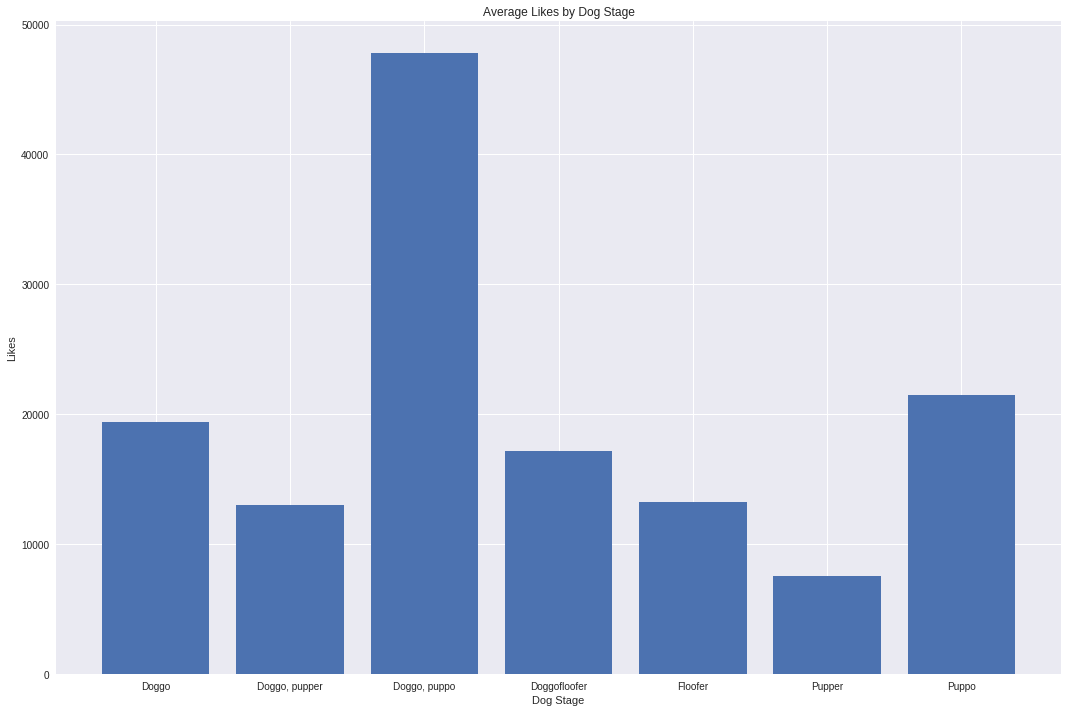

In [74]:
# plot results on a bar graph
plt.figure(figsize=(18, 12))
plt.rcParams.update({'font.size': 18})
plt.title('Average Likes by Dog Stage')
plt.xlabel('Dog Stage')
plt.ylabel('Likes')
plt.bar(x_pos, y_pos)
plt.savefig('likes_dog_stage.png');

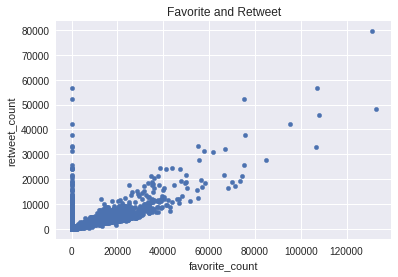

In [88]:
# Correlation between profit and budget
data_3.plot(x='favorite_count', y='retweet_count', kind='scatter', title = 'Favorite and Retweet');

In [90]:
data_3['favorite_count'].corr(data_3['retweet_count'])

0.70288135961450349

### Insights:
1. Tweets that categorize as doggo and puppo have received the most likes on average.

2. There is a positive correlation between favorite and Retweet.

3. The amount of likes seems to be related to the amount of retweets